# Exploratory Data Analysis of the Insurance Dataset for Predicting Charges

## Libraries

### Importing libraries

##### Pandas
Library used for data manipulation and analysis.

##### Matplotlib
Library for creating static, interactive, and animated visualizations in Python.

##### Seaborn
Library built on top of Matplotlib, designed for making statistical graphics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

### Load the CSV file

In [2]:
df = pd.read_csv('../dataset/insurance.csv')

## Data preview

### First few rows of the DataFrame

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Shape of the DataFrame

In [4]:
df.shape

(1338, 7)

### Information about the DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Summary statistics of the DataFrame

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Values of the column "sex"
The dataset is evenly distributed between males and females.

In [7]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

### Values of the column "smoker"
The dataset shows a higher frequency of non-smokers compared to smokers.

In [8]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

### Values of the column "region"
The dataset is evenly distributed across regions, with similar frequencies observed for each region.

In [9]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

## Checking Data

### Check for null values in the DataFrame
The dataset does not contain any null values, so there is no need for imputation or filling missing data.

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Lowest age of individuals who have children
The lowest age of individuals with children is 18, which is considered acceptable.

In [11]:
lowest_age_with_children = df[df['children'] > 0]['age'].min()
print(f"The lowest age of individuals with children is: {lowest_age_with_children}")

The lowest age of individuals with children is: 18


### Lowest age of individuals who smoke
The lowest age of individuals who smoke is 18, which is considered acceptable.

In [12]:
lowest_age_smoker = df[df['smoker'] == 'yes']['age'].min()
print(f"The lowest age of individuals who smoke is: {lowest_age_smoker}")

The lowest age of individuals who smoke is: 18


### Check for duplicated rows
Duplicated rows are recommended to be dropped because they do not provide additional information and can lead to biased results, overfitting, or inflated performance metrics during model training and evaluation. Removing duplicates ensures the dataset remains clean and representative of unique observations.

In [13]:
duplicates = df.duplicated()

# Count the number of duplicated rows
num_duplicates = duplicates.sum()
print(f"Number of duplicated rows: {num_duplicates}")

# Display duplicated rows (if any)
if num_duplicates > 0:
    print(df[duplicates])

Number of duplicated rows: 1
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


## Distribution of Age, BMI, Children and Charges

### Distribution of feature column "age"
The age feature is well distributed, with a few distributed spikes and a noticeably higher frequency observed at age 18.

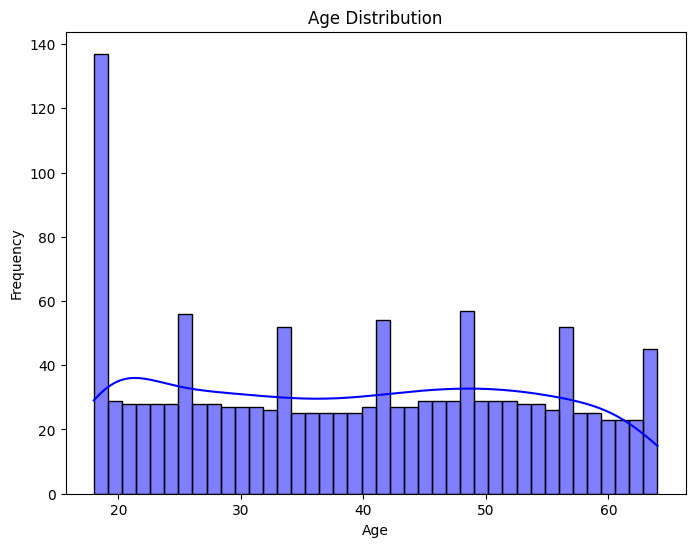

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=40, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Mode of the 'age' column

In [15]:
age_mode = df['age'].mode()[0]
print(f"The mode of the age column is: {age_mode}")

The mode of the age column is: 18


### Distribution of feature column "bmi"
The distribution of the BMI feature is approximately symmetric, indicating that the values are evenly spread around the mean with no significant skewness.

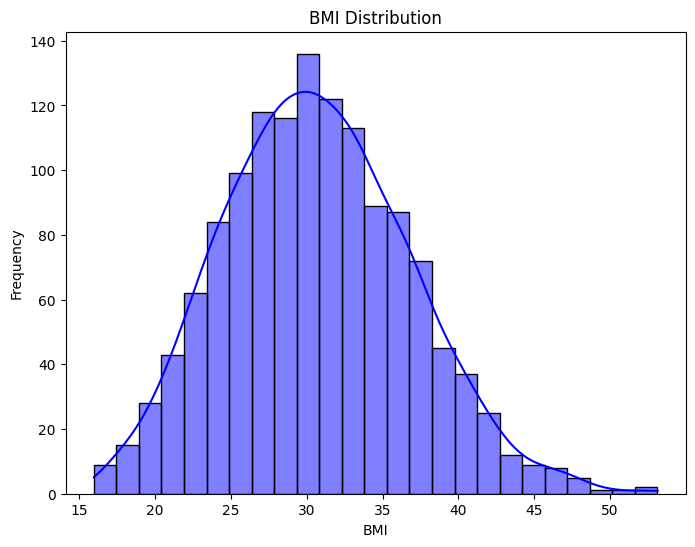

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, bins=25, color='blue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

### Distribution of feature column "children"
The distribution of the children feature is right-skewed, indicating that most individuals have fewer children, with a decreasing frequency as the number of children increases. This skewness suggests that having more children is less common in the dataset.

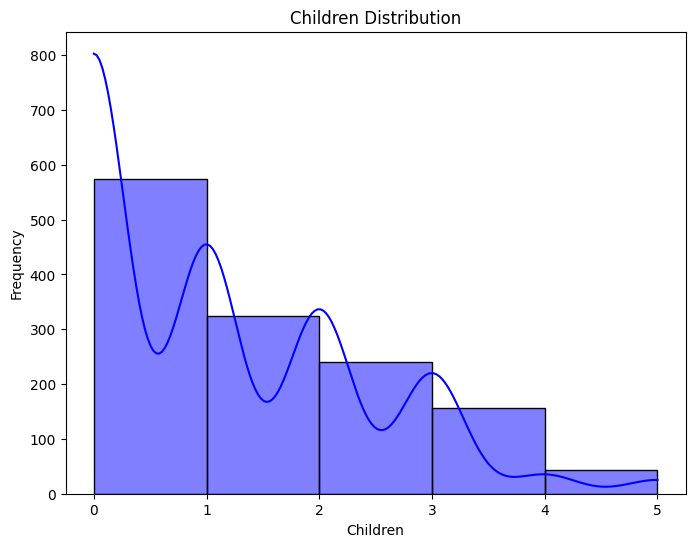

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['children'], kde=True, bins=5, color='blue')
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.show()

### Distribution of target column "charges"
The charges feature is right-skewed, which may lead to higher residual errors for the less frequent higher values. This skewness can adversely affect the model's performance by lowering metrics like R² and increasing the Mean Squared Error (MSE).

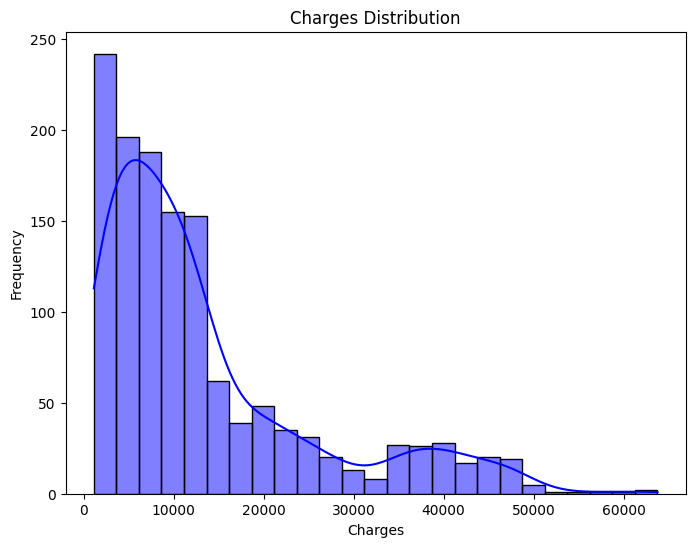

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True, bins=25, color='blue')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

 ## Correlation Heatmap
 Age shows the strongest correlation with the target variable (charges), followed by BMI and the number of children.

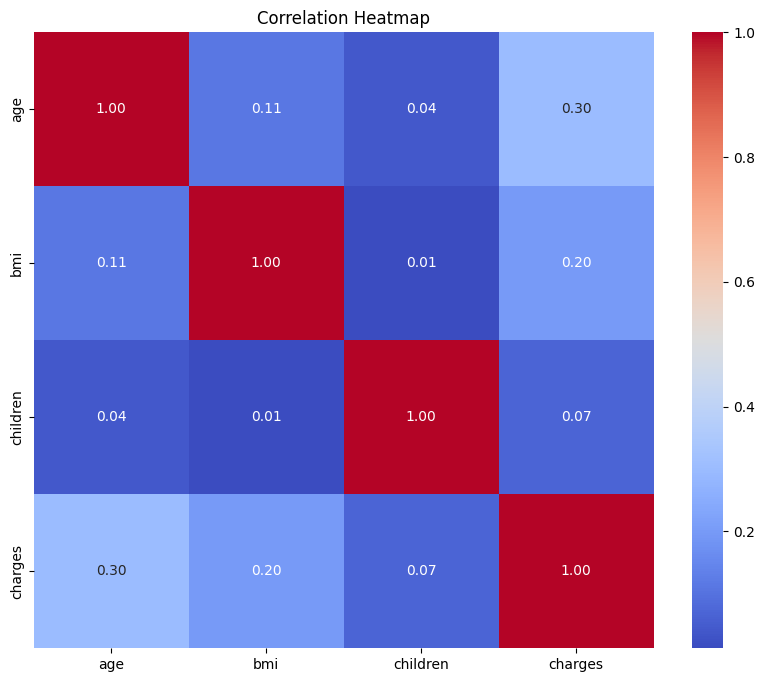

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Analysis of Age and Charges Column

### Line plot with age and charges
It is evident that higher ages are generally associated with higher charges, displaying a linear trend. This suggests a positive correlation between age and charges.

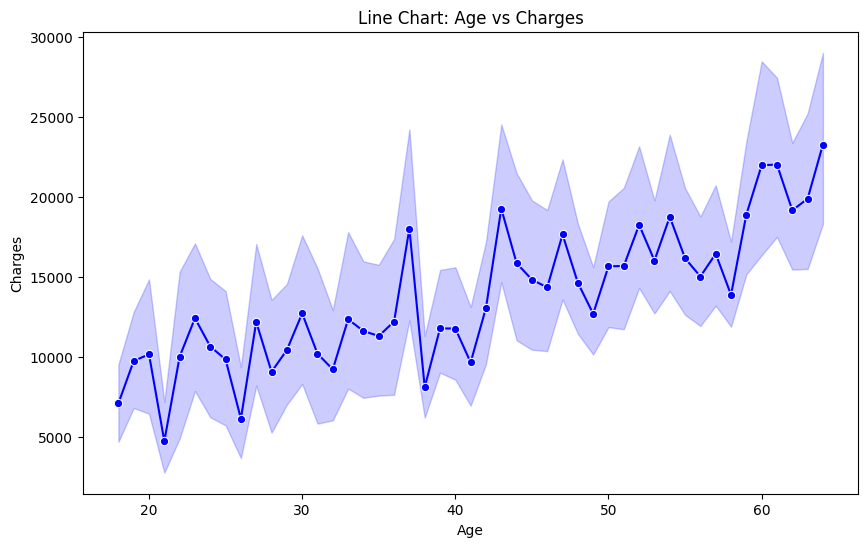

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='charges', data=df, marker='o', color='blue')
plt.title('Line Chart: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

### Scatter plot of age and charges
A linear trend is evident, with higher charges generally correlating with increasing age. However, there is considerable variability in charges within each age group, reflecting a wide range of values. Additionally, three distinct linear clusters can be observed, suggesting potential subgroup patterns.

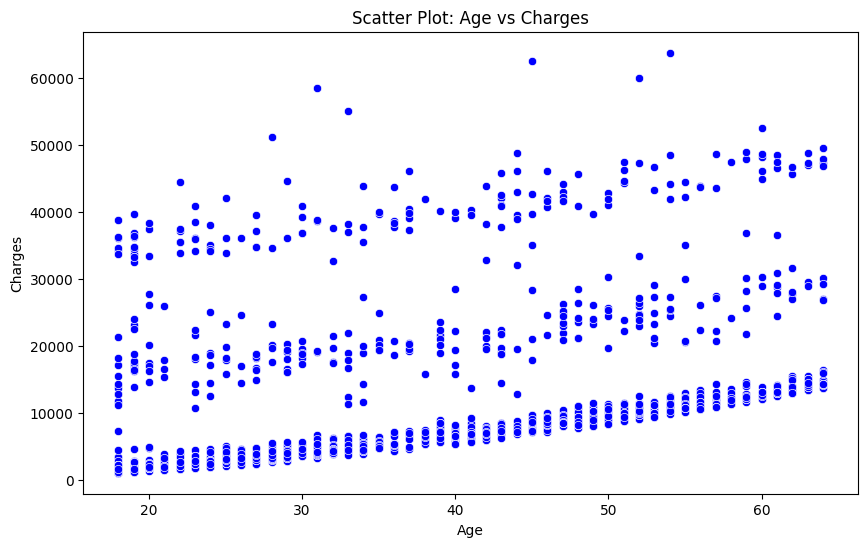

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, color='blue')
plt.title('Scatter Plot: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

### Scatter plot of age and charges by smoker
It's evident that individuals who smoke tend to have higher charges compared to those who do not smoke.

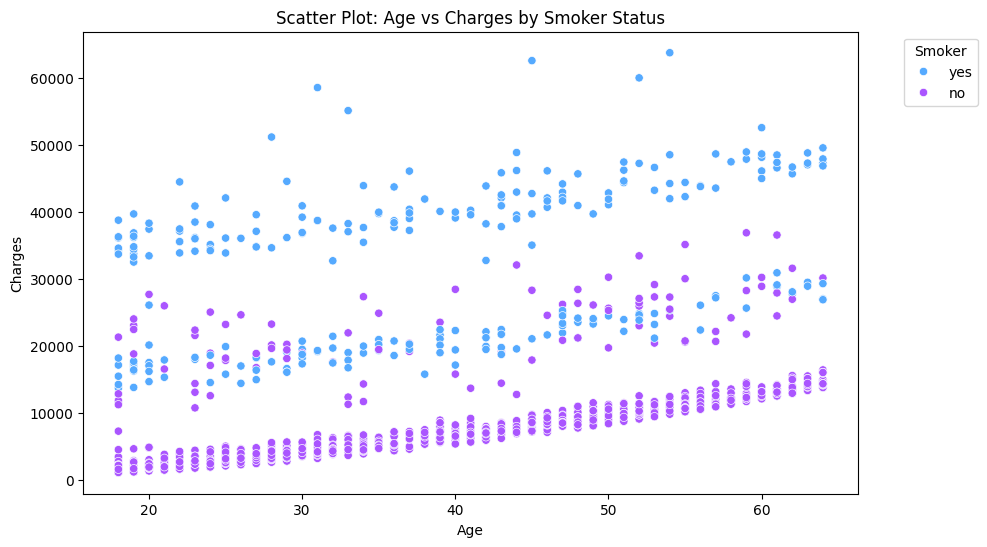

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='age', 
    y='charges', 
    hue='smoker', 
    data=df, 
    palette='cool'
)
plt.title('Scatter Plot: Age vs Charges by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Scatter plot of age and charges by children
The correlation between charges and the number of children is weak and does not show a clear trend, indicating that the number of children might have minimal impact on the charges.

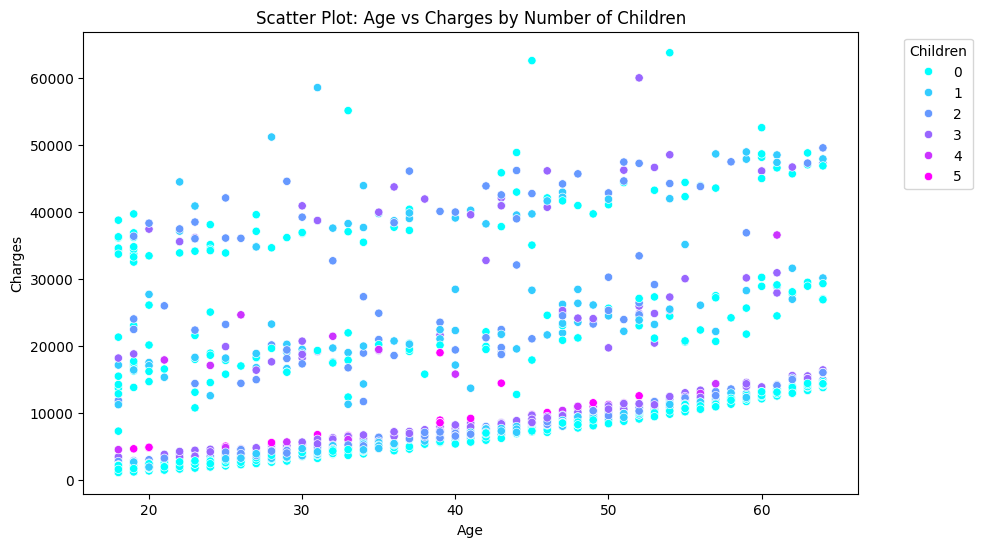

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='age', 
    y='charges', 
    hue='children', 
    data=df, 
    palette='cool'
)
plt.title('Scatter Plot: Age vs Charges by Number of Children')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Children', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Scatter plot of age and charges by sex
It is not possible to discern a clear pattern in the sex feature with respect to charges, as the charges are evenly distributed across both sexes without any significant differences or trends.

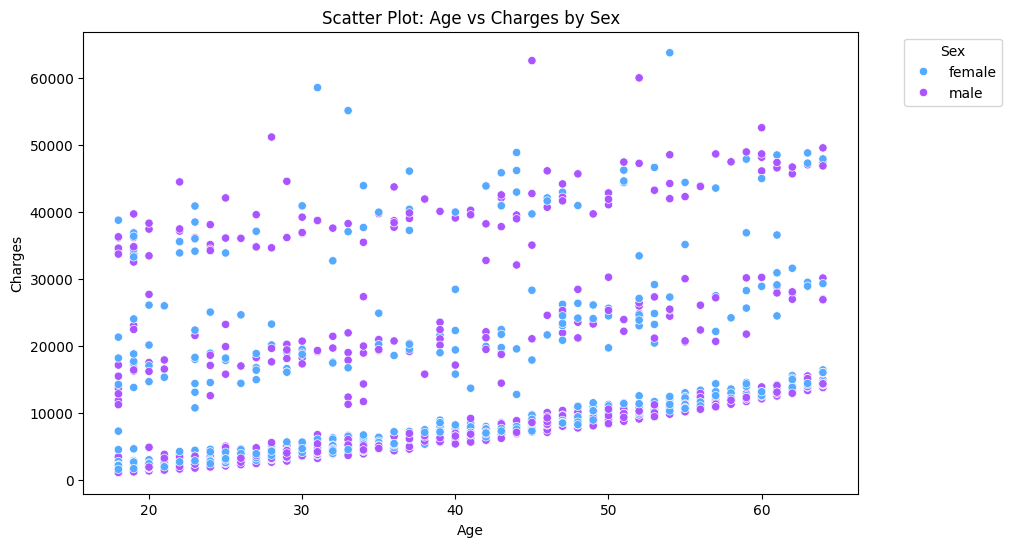

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='age', 
    y='charges', 
    hue='sex', 
    data=df, 
    palette='cool'
)
plt.title('Scatter Plot: Age vs Charges by Sex')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Scatter plot of age and charges by region
It is not possible to observe a clear pattern in the region feature with respect to charges, as the charges appear to be evenly distributed across all regions without significant variation.

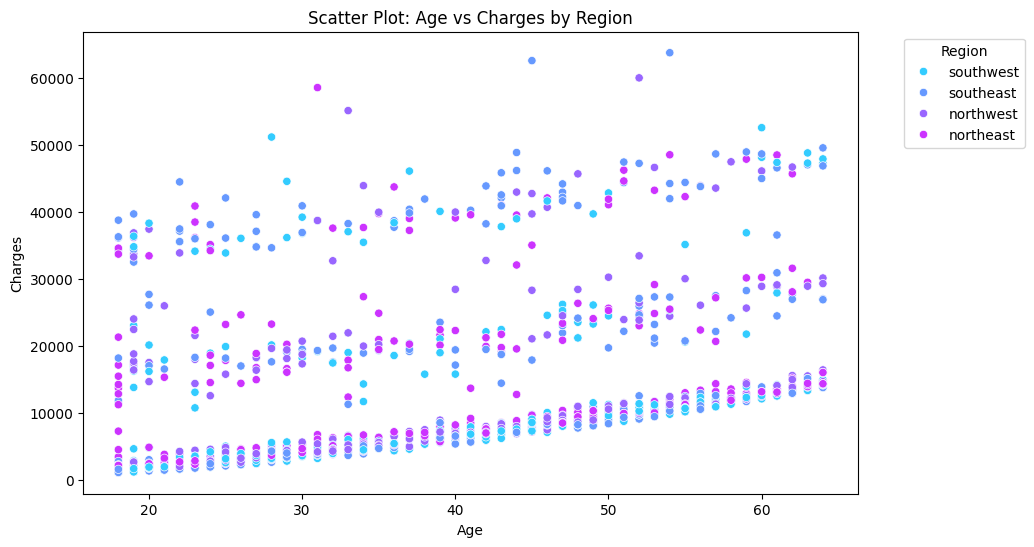

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='age', 
    y='charges', 
    hue='region', 
    data=df, 
    palette='cool'
)
plt.title('Scatter Plot: Age vs Charges by Region')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Analysis of BMI and Charges Column

### Line plot with bmi and charges
It can be observed that there is no clear linear trend, and BMI does not exhibit a distinct pattern in relation to charges.

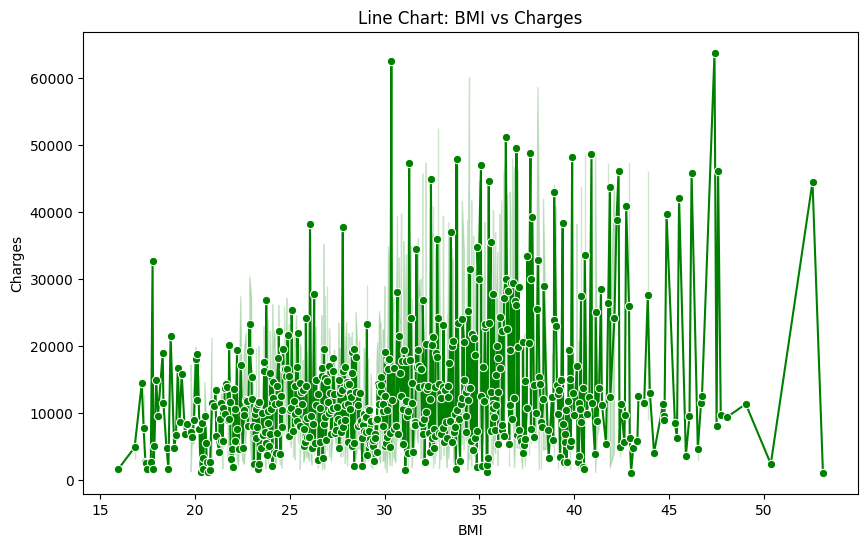

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='bmi', y='charges', data=df, marker='o', color='green')
plt.title('Line Chart: BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Scatter plot with bmi and charges
It is challenging to identify a clear pattern. However, two distinct linear groups can be observed, suggesting the presence of underlying subgroups within the data.

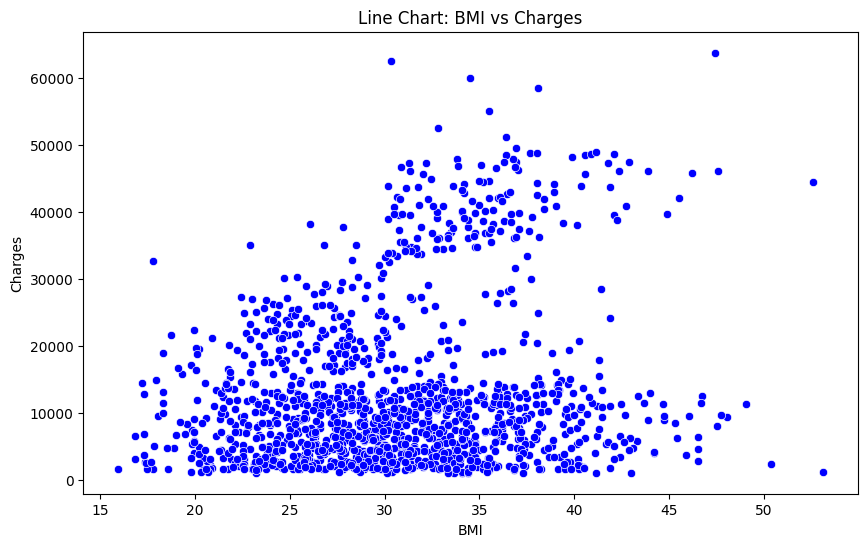

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df, color='blue')
plt.title('Line Chart: BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Scatter plot with bmi and charges by smoker
It is possible to observe how BMI varies between smokers and non-smokers. Smokers with higher BMI values tend to incur higher charges compared to non-smokers, indicating a significant interaction between smoking status, BMI, and charges.

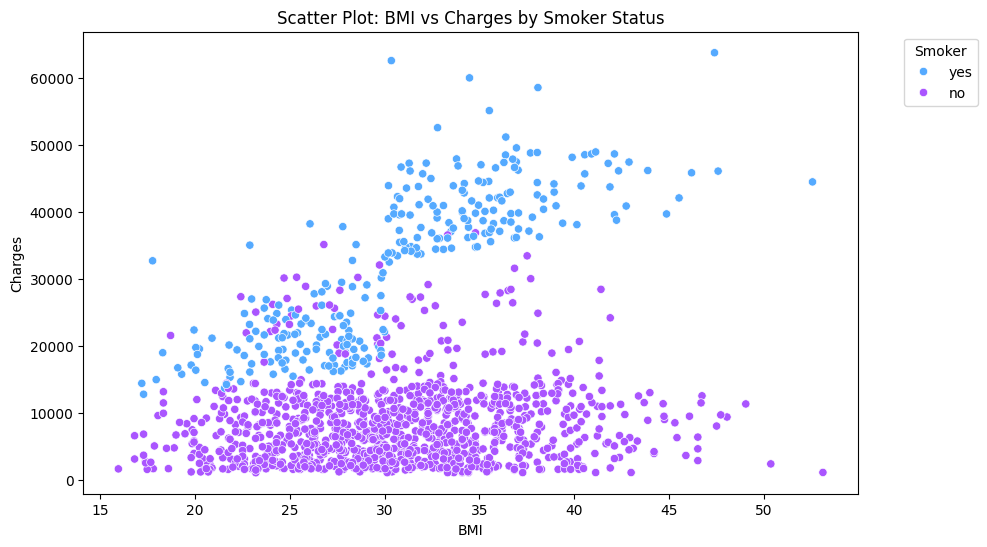

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='bmi',
    y='charges',
    hue='smoker',
    data=df,
    palette='cool'
)
plt.title('Scatter Plot: BMI vs Charges by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Scatter plot of BMI and charges by children
It is difficult to discern a clear pattern in the data, as the distribution appears scattered and does not exhibit any noticeable trends or relationships.

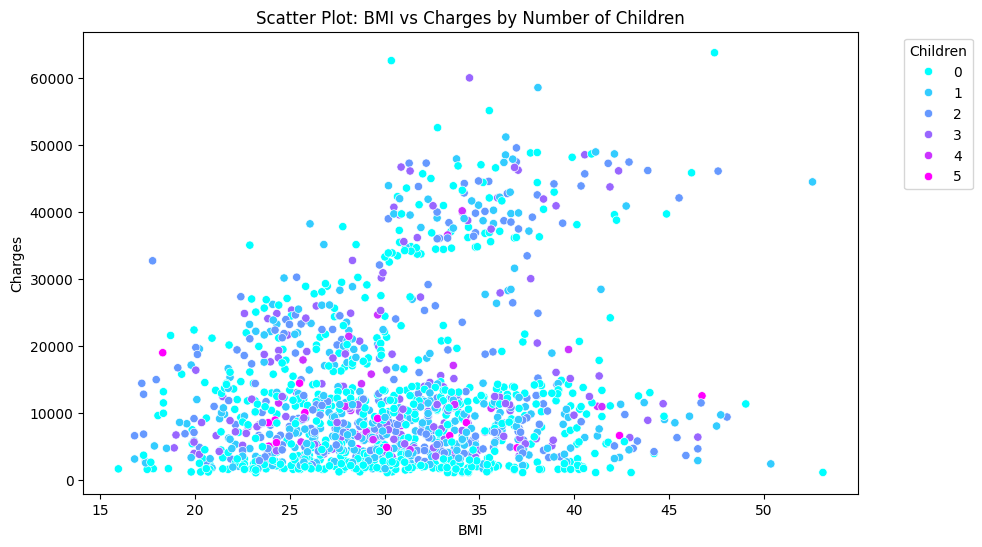

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='bmi', 
    y='charges', 
    hue='children', 
    data=df, 
    palette='cool'
)
plt.title('Scatter Plot: BMI vs Charges by Number of Children')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Children', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Scatter plot of BMI and charges by sex
It is difficult to discern a clear pattern in the data, as the distribution appears scattered and does not exhibit any noticeable trends or relationships.

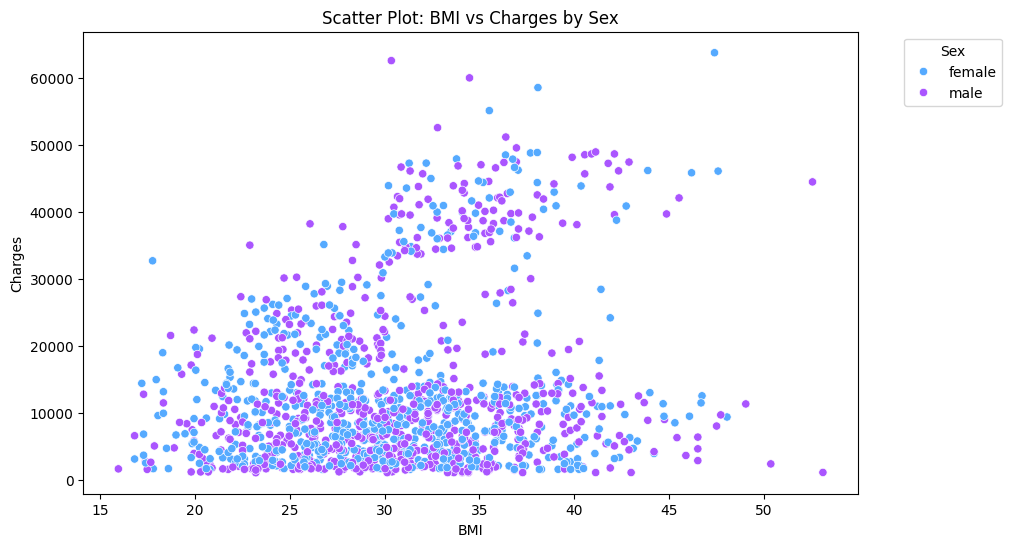

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='bmi', 
    y='charges', 
    hue='sex', 
    data=df, 
    palette='cool'
)
plt.title('Scatter Plot: BMI vs Charges by Sex')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Scatter plot of BMI and charges by region
It is difficult to discern a clear pattern in the data, as the distribution appears scattered and does not exhibit any noticeable trends or relationships.

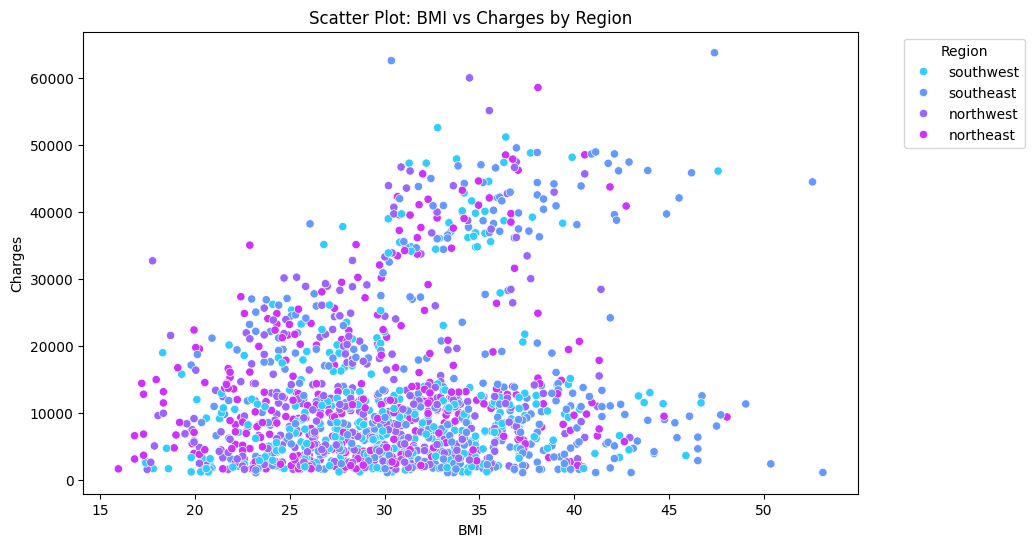

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='bmi', 
    y='charges', 
    hue='region', 
    data=df, 
    palette='cool'
)
plt.title('Scatter Plot: BMI vs Charges by Region')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Analysis of Children and Charges Column

### Boxplot of Charges by Number of Children
The feature (children) shows some variability across different numbers of children, indicating that it has limited predictive power. While it may contribute to the model's performance, its impact is likely to be minimal.

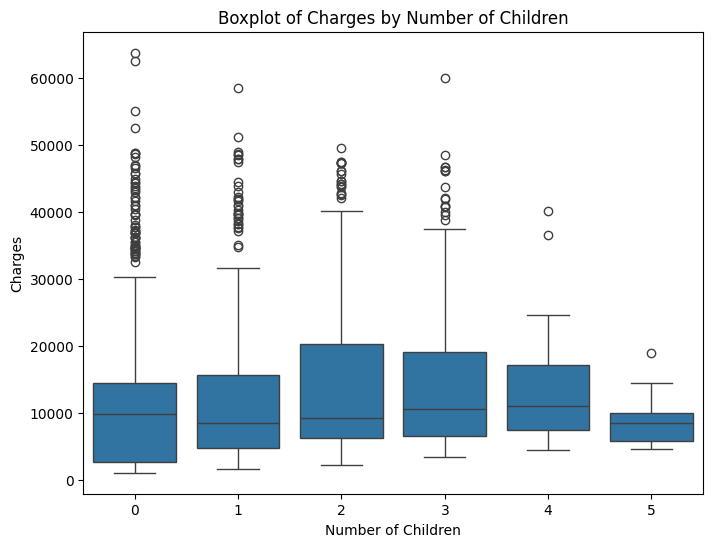

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Boxplot of Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

## Analysis of Sex and Charges Column

### Boxplot of Charges by Sex
The feature (sex) has a similar variability for both male and female groups. Therefore, it has lower predictive power and could increase complexity without improving performance, potentially leading to overfitting.

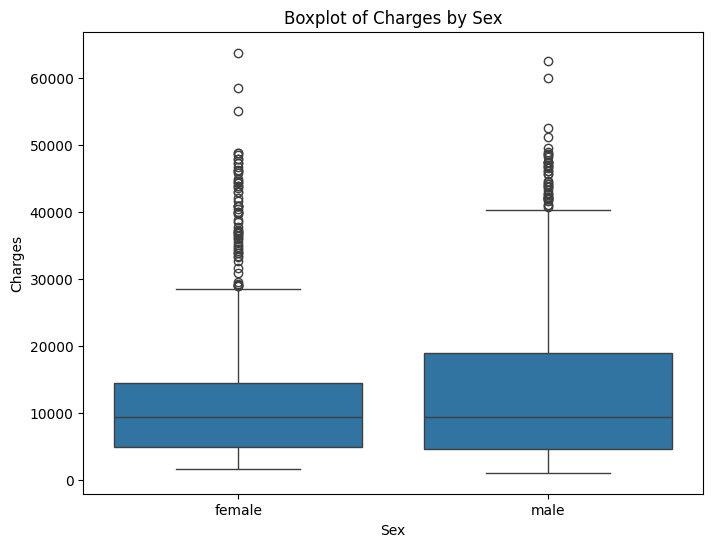

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Boxplot of Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

## Analysis of Region and Charges Column

### Boxplot of Charges by Region
The feature (region) has a similar variability for southwest, southeast, northwest and northeast groups. Therefore, it has lower predictive power and could increase complexity without improving performance, potentially leading to overfitting.

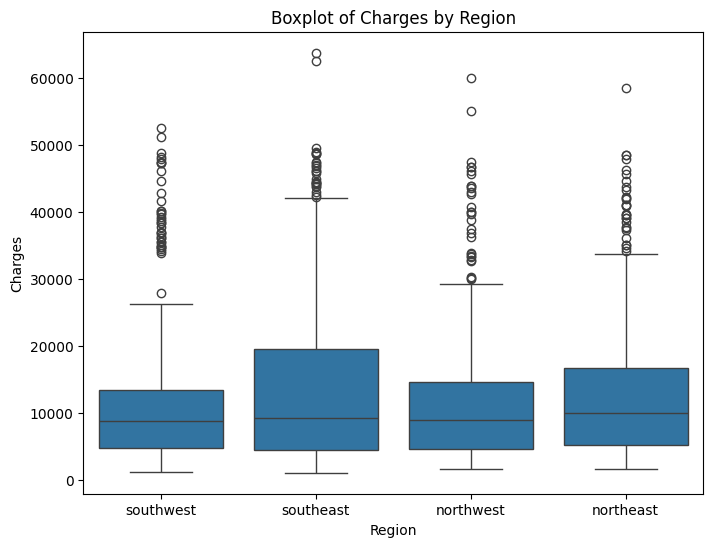

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Boxplot of Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()